<a href="https://colab.research.google.com/github/heber-augusto/course-stats-with-python/blob/main/part-3/Teste_de_Hip%C3%B3tese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 3</font>

***

## Trabalho sobre testes de hipóteses

Utilizando os conhecimentos adquiridos em nosso treinamento realize o teste de hipóteses proposto abaixo.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais testes interessantes que podem ser realizados com o nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [1]:
import pandas as pd
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color='red'>Problema</font>

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

---

### Seleção das amostras

In [13]:
#33	Rio de Janeiro
#35	São Paulo

trabalhadores_rj = dados[dados.UF == 33].sample(n = 500, random_state=101).Renda
trabalhadores_sp = dados[dados.UF == 35].sample(n = 500, random_state=101).Renda

### Dados do problema
Obter média e desvio-padrão para as duas amostras

In [14]:
media_sp = trabalhadores_sp.mean()
media_rj = trabalhadores_rj.mean()
print(f'Media SP: {media_sp}')
print(f'Media RJ: {media_rj}')

Media SP: 2839.352
Media RJ: 2240.518


In [15]:
std_sp = trabalhadores_sp.std()
std_rj = trabalhadores_rj.std()
print(f'STD SP: {std_sp}')
print(f'STD RJ: {std_rj}')

STD SP: 3699.384225434127
STD RJ: 4643.836161867941


In [16]:
significancia = 0.05
confianca = 1 - significancia

## Lembre-se...

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

H0: media_rj - media_sp >= 0 (media_rj >= media_sp)

H1: media_rj - media_sp < 0  (media_rj < media_sp)



---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: não

### O desvio padrão populacional é conhecido?
#### Resp.: sim

---

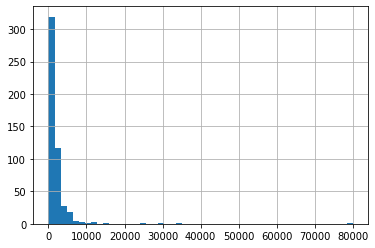

In [22]:
_ = trabalhadores_rj.hist(bins=50)

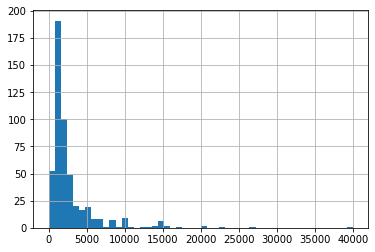

In [23]:
_ = trabalhadores_sp.hist(bins=50)

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [38]:
from scipy.stats import norm
probabilidade = significancia
probabilidade

0.05

In [39]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2 #valor de z para significancia de 5%

-1.6448536269514729

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

In [41]:
z_test = (media_rj - media_sp) / np.sqrt((std_rj**2/500) + (std_sp**2/500))
z_test

-2.255318273608561

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

### <font color='red'>Critério do valor crítico</font>
rejeitar H0 se ztest <= z_alpha

In [42]:
z_test <= -z_alpha_2

True

### <font color='red'>Critério do valor $p$</font>
rejeitar H0 se p_valor <= significancia

### Utilize DescrStatsW

In [30]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
test_rj = DescrStatsW(trabalhadores_rj)

In [32]:
test_sp = DescrStatsW(trabalhadores_sp)

In [33]:
test = test_rj.get_compare(test_sp)
z, p_valor = test.ztest_ind(alternative='smaller', value=0)
p_valor

0.012056679215693396

In [34]:
p_valor <= significancia

True

### Utilize CompareMeans

In [35]:
test = CompareMeans(test_rj, test_sp)

In [36]:
z, p_valor = test.ztest_ind(alternative='smaller', value=0)
p_valor

0.012056679215693396

In [37]:
p_valor <= significancia

True

### <font color='green'>Conclusão: (Digite sua conclusão aqui)</font>
Com nível de confiança de 95% podemos rejeitar a hipótese nula de que a renda média dos trabalhadores do Rio de Janeiro é maior ou igual a renda média dos trabalhadores de São Paulo. Desta forma, podemos aceitar a hipótese de que a renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo.